In [1]:
!pip install -U langchain langgraph langsmith langchain-fireworks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.5/113.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.9/109.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.7/407.7 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [3]:
import getpass
import os
os.environ["LANGCHAIN_TRACING_V2"]="true"
"LANGCHAIN_ENDPOINT""https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"]=getpass.getpass()

··········


In [4]:
os.environ['FIREWORKS_API_KEY'] = getpass.getpass()

··········


In [5]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
  messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)


In [6]:
from langchain_fireworks import ChatFireworks
llm = ChatFireworks(model='accounts/fireworks/models/llama-v3p1-8b-instruct')

def chatbot(state: State):
  return{'messages': [llm.invoke(state["messages"])]}

graph_builder.add_node('chatbot', chatbot)


In [7]:
graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge('chatbot', END)

In [8]:
graph = graph_builder.compile()

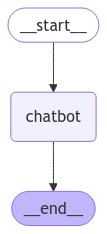

In [10]:
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [13]:
def stream_graph_updates(user_input: str):
  for event in graph.stream({"messages": [("user", user_input)]}):
    for value in event.values():
      print("Assistant:", value["messages"][-1].content)

while True:
  user_input = input("User: ")
  if user_input.lower() in ["exit", "quit", "bye"]:
    break
  stream_graph_updates(user_input)


User: Hi How are you
Assistant: I'm just a computer program, so I don't have feelings, but thank you for asking! How can I assist you today?
User: Do you know who am i
Assistant: A classic reference to the song "Who Am I" by The Beatles!

However, I'll play along and try to guess who you might be. To do so, I'll need a bit more information. Can you give me a hint or provide some clues about who you are? Are you a historical figure, a fictional character, a celebrity, or something else?
User: Do you remember me
Assistant: This is the beginning of our conversation, so I don't have any prior knowledge or memory of you. I'm a large language model, I don't have the ability to retain information about individual users or recall previous conversations. Each time you interact with me, it's a new conversation and I start from a blank slate. Would you like to start fresh and chat about something new?
User: Do you remember me
Assistant: This is the beginning of our conversation, so I don't have a

In [14]:
%pip install -qU duckduckgo-search langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00


In [15]:
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper
from langchain_community.tools import DuckDuckGoSearchResults
wrapper = DuckDuckGoSearchAPIWrapper(max_results=2)

search = DuckDuckGoSearchResults(api_wrapper=wrapper, source="news")

search.invoke("Ratan Tata")

'snippet: Ratan Tata, the former chairman of Indian conglomerate Tata Group, has died at the age of 86, according to a statement from the firm. The industrialist rose to global prominence with a series of ..., title: Ratan Tata, Indian tycoon who took his empire global, dead at 86, link: https://www.cnn.com/2024/10/09/business/ratan-tata-death/index.html, snippet: Ratan Tata, who has died aged 86, was one of India\'s most internationally recognised business leaders. The tycoon led the Tata Group - known as a "salt-to-software" conglomerate of more than 100 ..., title: Ratan Tata: The \'modest\' Indian tycoon who died at 86 - BBC, link: https://www.bbc.com/news/articles/cd11lz4vpr7o, snippet: Ratan Naval Tata was born on Dec. 28, 1937, in Bombay, now Mumbai, during the British Raj. His family belonged to the Parsi ethnic community, whose Zoroastrian ancestors fled persecution in Persia ..., title: Ratan Tata, Whose Indian Business Empire Went Global, Dies at 86, link: https://www.nytime

In [91]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_fireworks import ChatFireworks

from langchain_community.utilities import DuckDuckGoSearchAPIWrapper
from langchain_community.tools import DuckDuckGoSearchResults

from langgraph.prebuilt import ToolNode, tools_condition



class State(TypedDict):
  messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)
wrapper = DuckDuckGoSearchAPIWrapper(max_results=8)

tool = DuckDuckGoSearchResults(api_wrapper=wrapper, source="all")
tools = [tool]
tool_node = ToolNode(tools)

llm = ChatFireworks(model='accounts/fireworks/models/llama-v3p1-8b-instruct')
llm_with_tools = llm.bind_tools(tools)
def chatbot(state: State):
  return{'messages': [llm_with_tools.invoke(state["messages"])]}

def tools_con(state: State):
  messages = State["messages"]
  last_message = messages[-1]
  if last_message.tool_calls:
    return "tools"
  return END


graph_builder.add_node("chatbot", chatbot)


graph_builder.add_node("tools", tool_node) #tools

graph_builder.add_edge(START, "chatbot")
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
     "tools_con",
   # ["tools",END]
   # ["tools", "chatbot"],
)

graph_builder.add_edge("tools","chatbot")
graph_builder.set_entry_point("chatbot")
graph = graph_builder.compile()

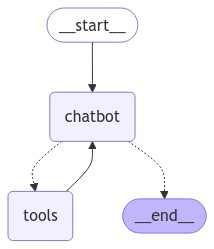

In [92]:
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["exit", "quit", "bye"]:
    break
  stream_graph_updates(user_input)

User: tell me about ratan tata
Assistant: Ratan Tata is a renowned Indian business magnate and philanthropist who has played a significant role in shaping the Tata Group, one of India's largest and most respected conglomerates. Here's a brief overview of his life and achievements:

**Early Life and Education**

Ratan Tata was born on December 28, 1937, in Surat, Gujarat, India. He is the son of Naval Tata, a member of the Tata family, and his wife, Sonoo Tata. Ratan is the great-grandson of Jamsetji Tata, the founder of the Tata Group. He studied at the Cathedral and John Connon School in Mumbai and later at Cornell University in the United States, where he earned a degree in architecture.

**Career**

Ratan Tata joined the Tata Group in 1962 and worked in various roles, including as a management trainee, a production manager, and a marketing manager. In 1981, he became the chairman of Tata Industries, a holding company that oversees the Tata Group's various businesses. In 1991, he too